In [34]:
import pickle
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np
import glob
from astropy.table import Table
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import cm
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
homedir = os.path.expanduser('~')
def normalized_cmap(val, low, high, cmap):
    cmap = plt.get_cmap(cmap)
    rang=high-low
    return cmap(int((val-low)*255/rang))
c = 2.99792e5 # km/s

from config_run import goodchips_run

### Binned BTSettl fits

In [62]:
datadir = f"{homedir}/uoedrive/result/CIFIST"
instru = "IGRINS"
target = "W1049A"
band = "K"
tag = "bounds"

In [63]:
chipmods = {}
chiplams = {}
chisq = {}
vsini = {}
rv = {}
lld = {}
modellist = []
for f in sorted(glob.glob(f"{datadir}/{instru}_{target}_{band}_{tag}_chipmods_*.fits")):
    modelname = f.split("_")[-1][:12]
    chipmods[modelname] = fits.getdata(f)
    modellist.append(modelname)
for f in sorted(glob.glob(f"{datadir}/{instru}_{target}_{band}_{tag}_chiplams_*.fits")):
    modelname = f.split("_")[-1][:12]
    chiplams[modelname] = fits.getdata(f)
for f in sorted(glob.glob(f"{datadir}/{instru}_{target}_{band}_{tag}_*.txt")):
    modelname = f.split("_")[-1][:12]
    results = Table.read(f, format='ascii')
    chisq[modelname] = results['chisq']
    vsini[modelname] = results['vsini']
    rv[modelname] = results['rv']
    lld[modelname] = results['lld']
chisq.keys()

dict_keys(['lte014.0-5.0', 'lte014.0-5.5', 'lte015.0-5.0', 'lte015.0-5.5', 'lte015.5-5.0', 'lte015.5-5.5', 'lte016.0-5.0', 'lte016.0-5.5', 'lte016.5-5.0', 'lte016.5-5.5', 'lte017.0-5.0', 'lte017.0-5.5', 'lte017.5-5.0', 'lte017.5-5.5', 'lte018.0-5.0', 'lte018.0-5.5', 'lte018.5-5.0', 'lte018.5-5.5'])

In [64]:
# find best fitting model
df = pd.DataFrame({
    'model name':[model for model in modellist], 
    'median':[np.median(chisq[model]) for model in modellist], 
    'mean':[np.mean(chisq[model]) for model in modellist], 
    'min':[np.min(chisq[model]) for model in modellist]
})
df = df.sort_values(by=['median'])
df.style.format({'median': '{:.0f}'.format, 'mean': '{:.0f}'.format,'min': '{:.0f}'.format,}).hide(axis="index")

model name,median,mean,min
lte016.5-5.0,16037900618,20263747910,4024432237
lte015.5-5.0,16070822630,20052757290,4661744960
lte016.0-5.0,16274388147,20020476704,4708953374
lte016.0-5.5,16596217646,21060067127,4807544716
lte017.0-5.5,16673901730,21671632586,4483325976
lte017.0-5.0,16739513540,20931275628,4151875273
lte017.5-5.0,17202326209,21393517361,4521947992
lte017.5-5.5,17292204623,22402145470,4324193922
lte018.0-5.5,17477164692,22380190572,4244834894
lte016.5-5.5,17711506359,23089626298,4458663936


In [66]:
model = 'lte016.5-5.0'
nobs = 14
vsini_2d = np.array(np.around(vsini[model].reshape((nobs, 20)), 1))
rv_2d = np.array(np.around(rv[model].reshape((nobs, 20)) * c, 1))
lld_2d = np.array(np.around(lld[model].reshape((nobs, 20)), 2))

#remove outliers
thres = 3
print("vsini outliers:", vsini_2d[np.abs(stats.zscore(vsini_2d, axis=None)) > thres])
vsini_2d[np.abs(stats.zscore(vsini_2d, axis=None)) > thres] = np.nan
print("rv outliers:", rv_2d[np.abs(stats.zscore(rv_2d, axis=None)) > thres])
rv_2d[np.abs(stats.zscore(rv_2d, axis=None)) > thres] = np.nan
print("lld outliers:", lld_2d[np.abs(stats.zscore(lld_2d, axis=None)) > thres])
lld_2d[np.abs(stats.zscore(lld_2d, axis=None)) > thres] = np.nan

indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

masked_vsini = vsini_2d[indices,:]
masked_rv = rv_2d[indices,:]
masked_lld = lld_2d[indices,:]

for i, jj in enumerate(range(20)):
    print(f"order {jj}\
    vsini: {np.nanmedian(vsini_2d[:,i]):.1f} ± {np.nanstd(vsini_2d[:,i]):.1f} km/s\
    rv: {np.nanmedian(rv_2d[:,i]):.1f} ± {np.nanstd(rv_2d[:,i]):.1f} km/s\
    lld: {np.nanmedian(lld_2d[:,i]):.2f} ± {np.nanstd(lld_2d[:,i]):.2f}")

print(f"all orders: \
    vsini: {np.nanmedian(vsini_2d):.1f} ± {np.nanstd(vsini_2d):.1f}\
    rv: {np.nanmedian(rv_2d):.1f} ± {np.nanstd(rv_2d):.1f}\
    lld: {np.nanmedian(lld_2d):.2f} ± {np.nanstd(lld_2d):.2f}")

print(f"good orders:\
    vsini: {np.nanmedian(masked_vsini):.1f} ± {np.nanstd(masked_vsini):.1f}\
    rv: {np.nanmedian(masked_rv):.1f} ± {np.nanstd(masked_rv):.1f}\
    lld: {np.nanmedian(masked_lld):.2f} ± {np.nanstd(masked_lld):.2f}")

vsini outliers: [89.4]
rv outliers: [27.4]
lld outliers: []
order 0    vsini: 20.1 ± 4.2 km/s    rv: 18.2 ± 2.1 km/s    lld: 0.44 ± 0.39
order 1    vsini: 19.4 ± 3.2 km/s    rv: 19.0 ± 2.3 km/s    lld: 0.40 ± 0.43
order 2    vsini: 20.9 ± 3.5 km/s    rv: 18.5 ± 2.3 km/s    lld: 1.00 ± 0.38
order 3    vsini: 19.4 ± 3.1 km/s    rv: 18.8 ± 2.4 km/s    lld: 0.77 ± 0.43
order 4    vsini: 19.5 ± 3.5 km/s    rv: 19.0 ± 2.2 km/s    lld: 1.00 ± 0.34
order 5    vsini: 19.9 ± 3.3 km/s    rv: 18.3 ± 2.6 km/s    lld: 0.65 ± 0.39
order 6    vsini: 20.3 ± 2.2 km/s    rv: 18.2 ± 2.4 km/s    lld: 0.56 ± 0.41
order 7    vsini: 19.7 ± 2.3 km/s    rv: 18.9 ± 2.9 km/s    lld: 0.77 ± 0.34
order 8    vsini: 19.9 ± 2.5 km/s    rv: 19.0 ± 2.4 km/s    lld: 1.00 ± 0.32
order 9    vsini: 21.5 ± 2.9 km/s    rv: 19.0 ± 2.3 km/s    lld: 1.00 ± 0.37
order 10    vsini: 20.1 ± 2.3 km/s    rv: 18.9 ± 3.0 km/s    lld: 0.41 ± 0.39
order 11    vsini: 20.6 ± 2.3 km/s    rv: 19.1 ± 2.3 km/s    lld: 0.79 ± 0.33
order 12    vs

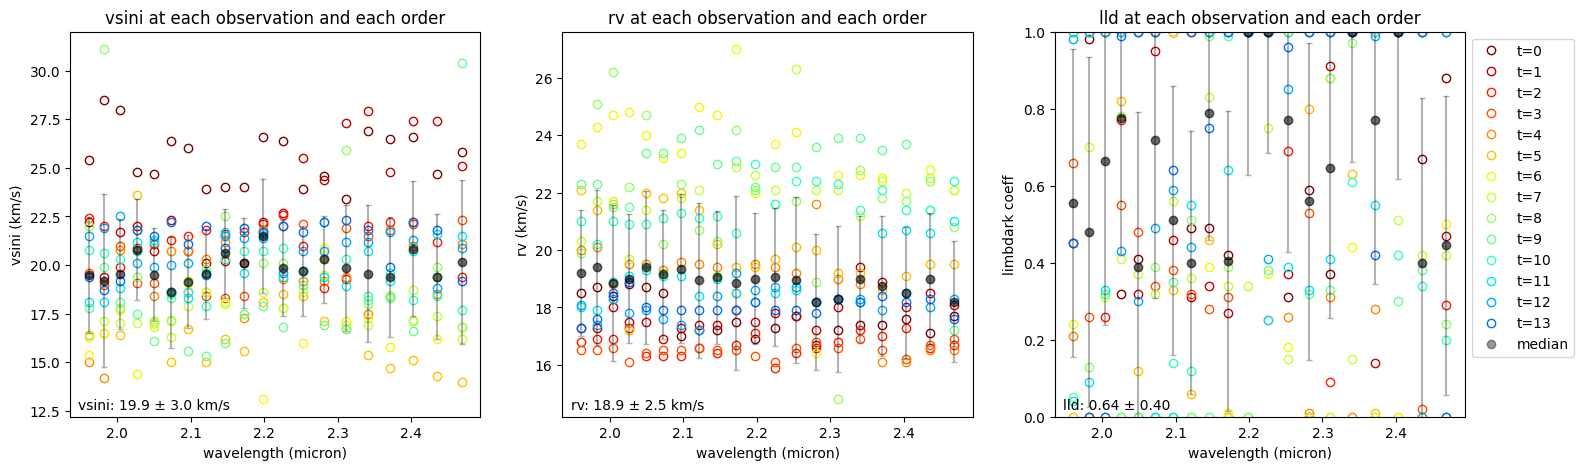

In [68]:
# vsini and rv for bestfittin model
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
colors = [cm.jet_r(x) for x in np.linspace(0, 1, nobs+4)]
vsini_points = masked_vsini
rv_points = masked_rv
lld_points = masked_lld
lam_points = np.median(np.median(chiplams[model], axis=0), axis=1) # plot one point per wl

for i, t in enumerate(indices):
    plt.plot(lam_points[:], vsini_points[i], "o", mfc="none", color=colors[t], label=f't={t}')
plt.plot(lam_points, np.nanmedian(vsini_points, axis=0), "o", label="median", color="k", alpha=0.4)
plt.errorbar(lam_points, np.nanmedian(vsini_points, axis=0), yerr=np.nanstd(vsini_points, axis=0), 
             marker="o", color="k", alpha=0.3, ls="none", capsize=2)
plt.xlabel("wavelength (micron)")
plt.ylabel("vsini (km/s)")
plt.title("vsini at each observation and each order")
plt.text(0.02, 0.02, f"vsini: {np.nanmedian(vsini_points)} ± {np.nanstd(vsini_points):.1f} km/s", transform=plt.gca().transAxes)

plt.subplot(1,3,2)
for i, t in enumerate(indices):
    plt.plot(lam_points, rv_points[i], "o", mfc="none", color=colors[t], label=f't={t}')
plt.plot(lam_points, np.nanmedian(rv_points, axis=0), "o", label="median", color="k", alpha=0.4)
plt.errorbar(lam_points, np.nanmedian(rv_points, axis=0), yerr=np.nanstd(rv_points, axis=0), 
             marker="o", color="k", alpha=0.3, ls="none", capsize=2)
plt.xlabel("wavelength (micron)")
plt.ylabel("rv (km/s)")
plt.title("rv at each observation and each order")
plt.text(0.02, 0.02, f"rv: {np.nanmedian(rv_points)} ± {np.nanstd(rv_points):.1f} km/s", transform=plt.gca().transAxes)

plt.subplot(1,3,3)
for i, t in enumerate(indices):
    plt.plot(lam_points, lld_points[i], "o", mfc="none", color=colors[t], label=f't={t}')
plt.plot(lam_points, np.nanmedian(lld_points, axis=0), "o", label="median", color="k", alpha=0.4)
plt.errorbar(lam_points, np.nanmedian(lld_points, axis=0), yerr=np.nanstd(lld_points, axis=0), 
             marker="o", color="k", alpha=0.3, ls="none", capsize=2)
plt.xlabel("wavelength (micron)")
plt.ylabel("limbdark coeff")
plt.ylim(0, 1)
plt.title("lld at each observation and each order")
plt.text(0.02, 0.02, f"lld: {np.nanmedian(lld_points):.2f} ± {np.nanstd(lld_points):.2f}", transform=plt.gca().transAxes)
plt.legend(loc=2, bbox_to_anchor=(1,1));

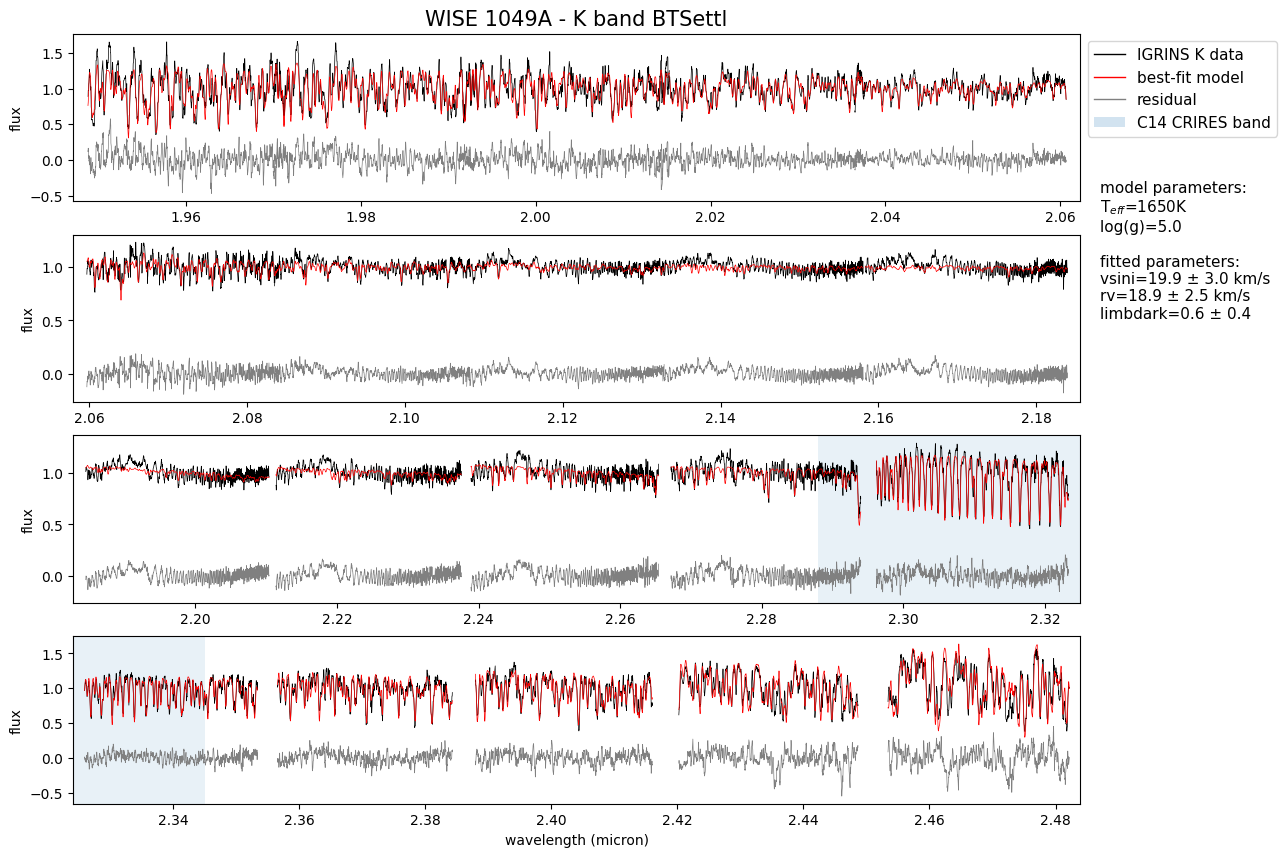

In [78]:
# plot best fitting spectrum
pad = 50
bfit_filename = f'IGRINS_{target}_{band}_{model}.pickle'
with open(f"{datadir}/{bfit_filename}", 'rb') as f:
    ret = pickle.load(f, encoding="latin1")
fobs = ret['fobs0']
fobs = fobs[:20]
wobs = ret['wobs']
plt.figure(figsize=(13,10))
Teff = eval(model[3:8])*100
logg = model[9:12]

t=5
for sub in range(4):
    plt.subplot(4,1, 4-sub)
    for jj in range(sub*5, sub*5+5):
        plt.plot(chiplams[model][t,jj, pad:-pad], fobs[t,jj, pad:-pad], linewidth=0.5, color="black", label="observation")
        plt.plot(chiplams[model][t,jj, pad:-pad], fobs[t,jj,pad:-pad] - chipmods[model][t,jj,pad:-pad], linewidth=0.5, color="gray", label="residual")
        if jj in indices:
            plt.plot(chiplams[model][t,jj, pad:-pad], chipmods[model][t,jj, pad:-pad], linewidth=0.5, color="r", label="best-fit model")
        else:
            plt.plot(chiplams[model][t,jj, pad:-pad], chipmods[model][t,jj, pad:-pad], linewidth=0.5, color="r", label="discarded orders")
    plt.ylabel("flux")
    l, r = plt.xlim(chiplams[model][t,sub*5+4].min()-0.001, chiplams[model][t,sub*5].max()+0.001)
    #plt.ylim(-0.37,1.26)
    if sub==1:
        plt.axvspan(2.288, r, alpha=0.1)
    if sub==0:
        plt.axvspan(l, 2.345, alpha=0.1)
        plt.xlabel("wavelength (micron)")
    if sub==3:
        custom_lines = [Line2D([0], [0], color="black", lw=1, label=f"IGRINS {band} data"),
                        Line2D([0], [0], color="r", lw=1, label="best-fit model"),
                        Line2D([0], [0], color="grey", lw=1, label="residual"),
                        #Line2D([0], [0], color="magenta", lw=1, label="discarded orders"),
                        Patch(facecolor='tab:blue', alpha=0.2, label="C14 CRIRES band")
                        ]
        plt.legend(handles=custom_lines, loc=2, bbox_to_anchor=(1,1), fontsize=11)

plt.title(f"WISE {target[1:]} - {band} band BTSettl", fontsize=15)
plt.text(x=1.02, y=-0.7, s="model parameters: \nT$_{eff}$="+f"{Teff:.0f}K \nlog(g)={logg} \n"+ 
                        f"\nfitted parameters: \nvsini={np.nanmedian(vsini_2d)} ± {np.nanstd(vsini_2d):.1f} km/s" +
                        f"\nrv={np.nanmedian(rv_2d)} ± {np.nanstd(rv_2d):.1f} km/s" +
                        f"\nlimbdark={np.nanmedian(lld_2d):.1f} ± {np.nanstd(lld_2d):.1f}",
        fontsize=11, transform=plt.gca().transAxes);

### Binned Callie fits

In [84]:
datadir = f"{homedir}/uoedrive/result/Callie"
instru = "IGRINS"
target = "W1049A"
band = "K"
tag = "bounds"

In [85]:
nobs = 14
chipmods = {}
chiplams = {}
chisq = {}
vsini = {}
rv = {}
lld = {}
wcoef = {}
modellist = []
for f in sorted(glob.glob(f"{datadir}/{instru}_{target}_{band}_{tag}_chipmods_*.fits")):
    modelname = f.split("_")[-1][:12]
    chipmods[modelname] = fits.getdata(f)
    modellist.append(modelname)
for f in sorted(glob.glob(f"{datadir}/{instru}_{target}_{band}_{tag}_chiplams_*.fits")):
    modelname = f.split("_")[-1][:12]
    chiplams[modelname] = fits.getdata(f)
for f in sorted(glob.glob(f"{datadir}/{instru}_{target}_{band}_{tag}_*.txt")):
    modelname = f.split("_")[-1][:12]
    results = Table.read(f, format='ascii')
    chisq[modelname] = results['chisq']
    vsini[modelname] = results['vsini']
    rv[modelname] = results['rv']
    lld[modelname] = results['lld']
chisq.keys()

dict_keys(['t1400g1000f4', 't1400g1000f8', 't1500g1000f4', 't1500g1000f8'])

In [86]:
# find best fitting model
df = pd.DataFrame({
    'model name':[model for model in modellist], 
    'median':[np.median(chisq[model]) for model in modellist], 
    'mean':[np.mean(chisq[model]) for model in modellist], 
    'min':[np.min(chisq[model]) for model in modellist]
})
df = df.sort_values(by=['median'])
df.style.format({'median': '{:.0f}'.format, 'mean': '{:.0f}'.format,'min': '{:.0f}'.format,}).hide(axis="index")

model name,median,mean,min
t1400g1000f4,14405856030,16763085481,14651
t1500g1000f8,14847384329,16274408374,4026697375
t1500g1000f4,16099049879,20047934118,4090961832
t1400g1000f8,35496234939,48860831584,15378


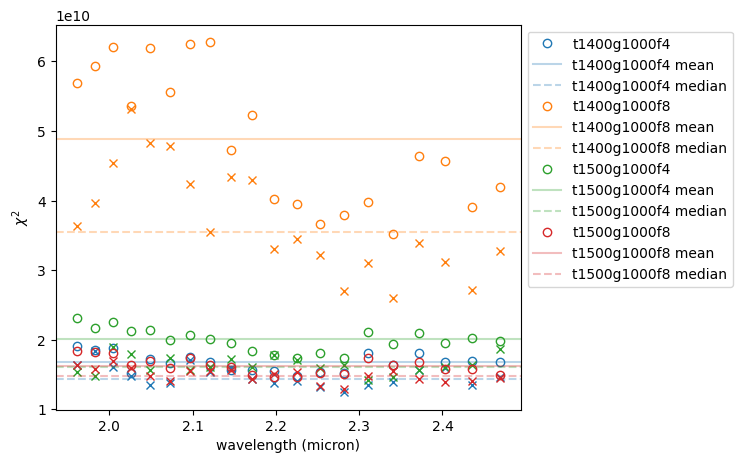

In [87]:
plt.figure(figsize=(6,5))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
lam_points = np.median(np.median(chiplams[model], axis=0), axis=1)
for i, key in enumerate(chisq.keys()):
    plt.plot(lam_points, np.mean(chisq[key].reshape(14, 20), axis=0), "o", mfc="none", color=colors[i], label=f"{key}")
    plt.plot(lam_points, np.median(chisq[key].reshape(14, 20), axis=0), "x", mfc="none", color=colors[i])
    plt.axhline(np.mean(chisq[key]), color=colors[i], alpha=0.3, label=f"{key} mean")
    plt.axhline(np.median(chisq[key]), ls="--", color=colors[i], alpha=0.3, label=f"{key} median")
plt.ylabel("$\chi ^2$")
plt.xlabel("wavelength (micron)")
plt.legend(bbox_to_anchor=(1,1));

In [89]:
model = 't1500g1000f8'
vsini_2d = np.array(np.around(vsini[model].reshape((nobs, 20)), 1))
rv_2d = np.array(np.around(rv[model].reshape((nobs, 20)) * c, 1))
lld_2d = np.array(np.around(lld[model].reshape((nobs, 20)), 2))

#remove outliers
thres = 3
print("vsini outliers:", vsini_2d[np.abs(stats.zscore(vsini_2d, axis=None)) > thres])
vsini_2d[np.abs(stats.zscore(vsini_2d, axis=None)) > thres] = np.nan
print("rv outliers:", rv_2d[np.abs(stats.zscore(rv_2d, axis=None)) > thres])
rv_2d[np.abs(stats.zscore(rv_2d, axis=None)) > thres] = np.nan
print("lld outliers:", lld_2d[np.abs(stats.zscore(lld_2d, axis=None)) > thres])
lld_2d[np.abs(stats.zscore(lld_2d, axis=None)) > thres] = np.nan


indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
indices_masked = [0,1,2,3,4,7,9,10,11,12,13]

masked_vsini = vsini_2d[indices_masked,:]
masked_rv = rv_2d[indices_masked,:]
masked_lld = lld_2d[indices_masked,:]


for i, jj in enumerate(range(20)):
    print(f"order {jj}\
    vsini: {np.nanmedian(vsini_2d[:,i]):.1f} ± {np.nanstd(vsini_2d[:,i]):.1f} km/s\
    rv: {np.nanmedian(rv_2d[:,i]):.1f} ± {np.nanstd(rv_2d[:,i]):.1f} km/s\
    lld: {np.nanmedian(lld_2d[:,i]):.2f} ± {np.nanstd(lld_2d[:,i]):.2f}")

print(f"all orders: \
    vsini: {np.nanmedian(vsini_2d):.1f} ± {np.nanstd(vsini_2d):.1f}\
    rv: {np.nanmedian(rv_2d):.1f} ± {np.nanstd(rv_2d):.1f}\
    lld: {np.nanmedian(lld_2d):.2f} ± {np.nanstd(lld_2d):.2f}")

print(f"all orders w/o bad t:\
    vsini: {np.nanmedian(masked_vsini):.1f} ± {np.nanstd(masked_vsini):.1f}\
    rv: {np.nanmedian(masked_rv):.1f} ± {np.nanstd(masked_rv):.1f}\
    lld: {np.nanmedian(masked_lld):.2f} ± {np.nanstd(masked_lld):.2f}")

vsini outliers: [ 63.9  98.8  99.7 100.  100.  100.   97.5 100. ]
rv outliers: [ 34.6  45.   61.6  59.6 -34.4]
lld outliers: []
order 0    vsini: 20.0 ± 3.1 km/s    rv: 16.1 ± 1.2 km/s    lld: 0.73 ± 0.40
order 1    vsini: 20.2 ± 3.3 km/s    rv: 16.1 ± 1.4 km/s    lld: 0.97 ± 0.41
order 2    vsini: 19.6 ± 3.8 km/s    rv: 16.1 ± 1.0 km/s    lld: 0.73 ± 0.40
order 3    vsini: 19.4 ± 6.6 km/s    rv: 16.2 ± 1.7 km/s    lld: 0.67 ± 0.32
order 4    vsini: 19.5 ± 3.4 km/s    rv: 16.3 ± 1.5 km/s    lld: 0.36 ± 0.34
order 5    vsini: 20.0 ± 3.7 km/s    rv: 16.4 ± 0.8 km/s    lld: 0.65 ± 0.36
order 6    vsini: 20.3 ± 8.5 km/s    rv: 16.1 ± 1.1 km/s    lld: 0.48 ± 0.38
order 7    vsini: 21.1 ± 3.9 km/s    rv: 16.2 ± 0.7 km/s    lld: 0.91 ± 0.41
order 8    vsini: 19.2 ± 6.1 km/s    rv: 16.1 ± 2.6 km/s    lld: 0.59 ± 0.32
order 9    vsini: 18.7 ± 3.5 km/s    rv: 16.1 ± 1.6 km/s    lld: 0.55 ± 0.36
order 10    vsini: 19.9 ± 3.4 km/s    rv: 16.1 ± 0.5 km/s    lld: 0.98 ± 0.41
order 11    vsini: 19.4 

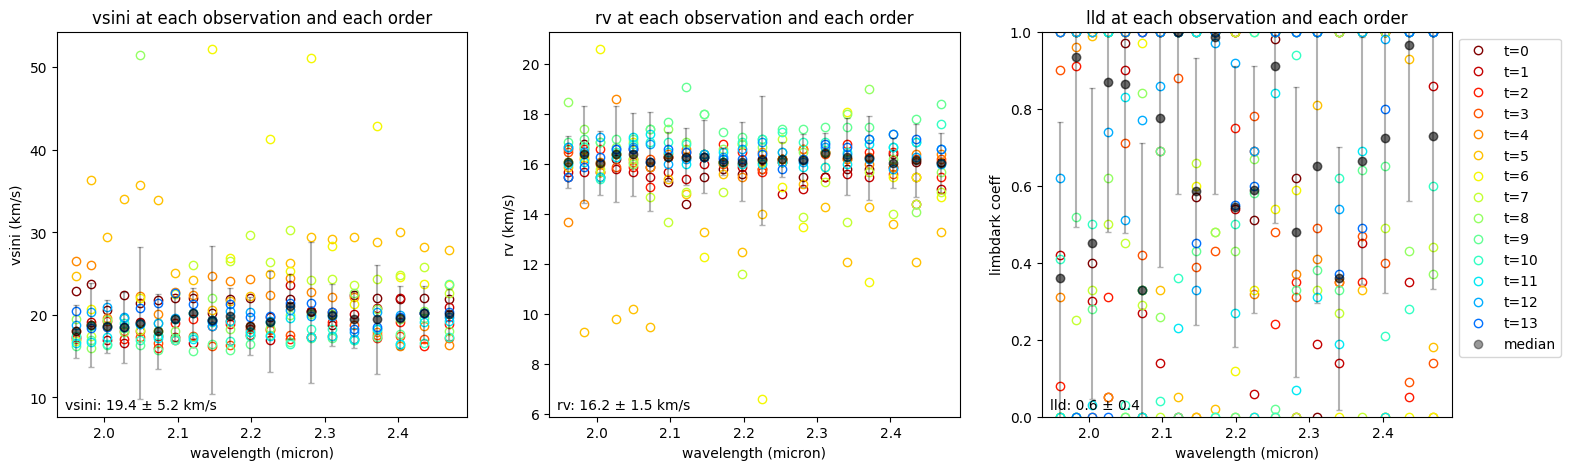

In [60]:
# Plot vsini and rv for bestfittin model - all
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
colors = [cm.jet_r(x) for x in np.linspace(0, 1, nobs+4)]
vsini_points = vsini_2d
rv_points = rv_2d
lld_points = lld_2d
lam_points = np.median(np.median(chiplams[model], axis=0), axis=1) # plot one point per wl

for i, t in enumerate(indices):
    plt.plot(lam_points[:], vsini_points[i], "o", mfc="none", color=colors[t], label=f't={t}')
plt.plot(lam_points, np.nanmedian(vsini_points, axis=0), "o", label="median", color="k", alpha=0.4)
plt.errorbar(lam_points, np.nanmedian(vsini_points, axis=0), yerr=np.nanstd(vsini_points, axis=0), 
             marker="o", color="k", alpha=0.3, ls="none", capsize=2)
plt.xlabel("wavelength (micron)")
plt.ylabel("vsini (km/s)")
plt.title("vsini at each observation and each order")
plt.text(0.02, 0.02, f"vsini: {np.nanmedian(vsini_points):.1f} ± {np.nanstd(vsini_points):.1f} km/s", transform=plt.gca().transAxes)

plt.subplot(1,3,2)
for i, t in enumerate(indices):
    plt.plot(lam_points, rv_points[i], "o", mfc="none", color=colors[t], label=f't={t}')
plt.plot(lam_points, np.nanmedian(rv_points, axis=0), "o", label="median", color="k", alpha=0.4)
plt.errorbar(lam_points, np.nanmedian(rv_points, axis=0), yerr=np.nanstd(rv_points, axis=0), 
             marker="o", color="k", alpha=0.3, ls="none", capsize=2)
plt.xlabel("wavelength (micron)")
plt.ylabel("rv (km/s)")
plt.title("rv at each observation and each order")
plt.text(0.02, 0.02, f"rv: {np.nanmedian(rv_points):.1f} ± {np.nanstd(rv_points):.1f} km/s", transform=plt.gca().transAxes)

plt.subplot(1,3,3)
for i, t in enumerate(indices):
    plt.plot(lam_points, lld_points[i], "o", mfc="none", color=colors[t], label=f't={t}')
plt.plot(lam_points, np.nanmedian(lld_points, axis=0), "o", label="median", color="k", alpha=0.4)
plt.errorbar(lam_points, np.nanmedian(lld_points, axis=0), yerr=np.nanstd(lld_points, axis=0), 
             marker="o", color="k", alpha=0.3, ls="none", capsize=2)
plt.xlabel("wavelength (micron)")
plt.ylabel("limbdark coeff")
plt.ylim(0, 1.)
plt.title("lld at each observation and each order")
plt.text(0.02, 0.02, f"lld: {np.nanmedian(lld_points):.1f} ± {np.nanstd(lld_points):.1f}", transform=plt.gca().transAxes)
plt.legend(loc=2, bbox_to_anchor=(1,1));

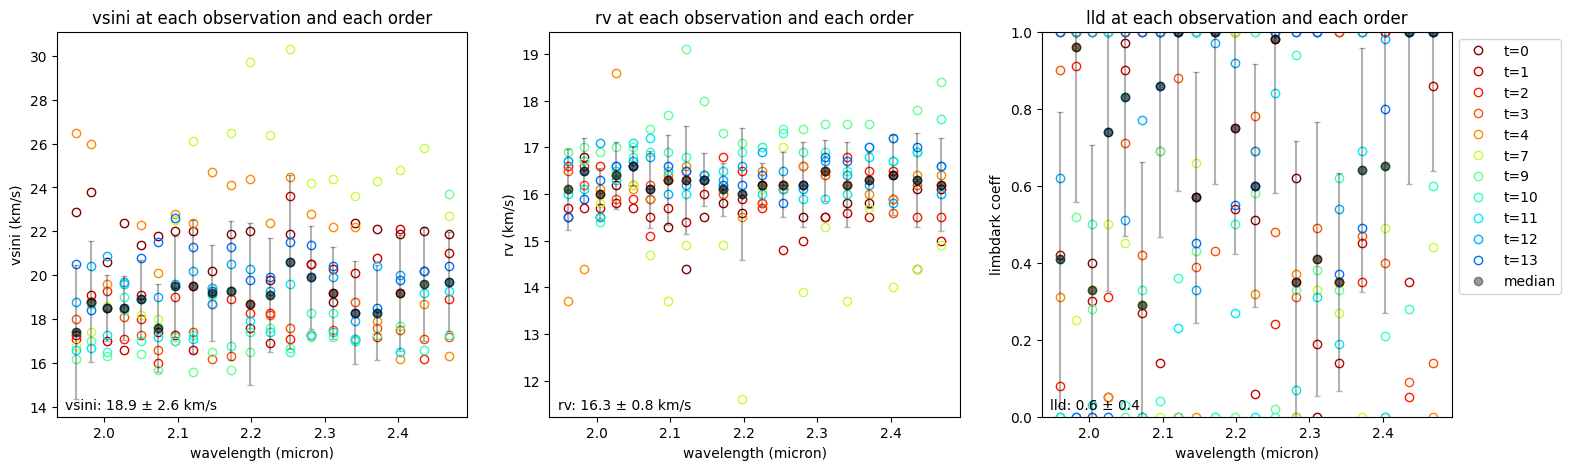

In [90]:
# Plot vsini and rv for bestfittin model
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
colors = [cm.jet_r(x) for x in np.linspace(0, 1, nobs+4)]
vsini_points = masked_vsini
rv_points = masked_rv
lld_points = masked_lld
lam_points = np.median(np.median(chiplams[model], axis=0), axis=1) # plot one point per wl

for i, t in enumerate(indices_masked):
    plt.plot(lam_points[:], vsini_points[i], "o", mfc="none", color=colors[t], label=f't={t}')
plt.plot(lam_points, np.nanmedian(vsini_points, axis=0), "o", label="median", color="k", alpha=0.4)
plt.errorbar(lam_points, np.nanmedian(vsini_points, axis=0), yerr=np.nanstd(vsini_points, axis=0), 
             marker="o", color="k", alpha=0.3, ls="none", capsize=2)
plt.xlabel("wavelength (micron)")
plt.ylabel("vsini (km/s)")
plt.title("vsini at each observation and each order")
plt.text(0.02, 0.02, f"vsini: {np.nanmedian(vsini_points):.1f} ± {np.nanstd(vsini_points):.1f} km/s", transform=plt.gca().transAxes)

plt.subplot(1,3,2)
for i, t in enumerate(indices_masked):
    plt.plot(lam_points, rv_points[i], "o", mfc="none", color=colors[t], label=f't={t}')
plt.plot(lam_points, np.nanmedian(rv_points, axis=0), "o", label="median", color="k", alpha=0.4)
plt.errorbar(lam_points, np.nanmedian(rv_points, axis=0), yerr=np.nanstd(rv_points, axis=0), 
             marker="o", color="k", alpha=0.3, ls="none", capsize=2)
plt.xlabel("wavelength (micron)")
plt.ylabel("rv (km/s)")
plt.title("rv at each observation and each order")
plt.text(0.02, 0.02, f"rv: {np.nanmedian(rv_points):.1f} ± {np.nanstd(rv_points):.1f} km/s", transform=plt.gca().transAxes)

plt.subplot(1,3,3)
for i, t in enumerate(indices_masked):
    plt.plot(lam_points, lld_points[i], "o", mfc="none", color=colors[t], label=f't={t}')
plt.plot(lam_points, np.nanmedian(lld_points, axis=0), "o", label="median", color="k", alpha=0.4)
plt.errorbar(lam_points, np.nanmedian(lld_points, axis=0), yerr=np.nanstd(lld_points, axis=0), 
             marker="o", color="k", alpha=0.3, ls="none", capsize=2)
plt.xlabel("wavelength (micron)")
plt.ylabel("limbdark coeff")
plt.ylim(0,1.)
plt.title("lld at each observation and each order")
plt.text(0.02, 0.02, f"lld: {np.nanmedian(lld_points):.1f} ± {np.nanstd(lld_points):.1f}", transform=plt.gca().transAxes)
plt.legend(loc=2, bbox_to_anchor=(1,1));

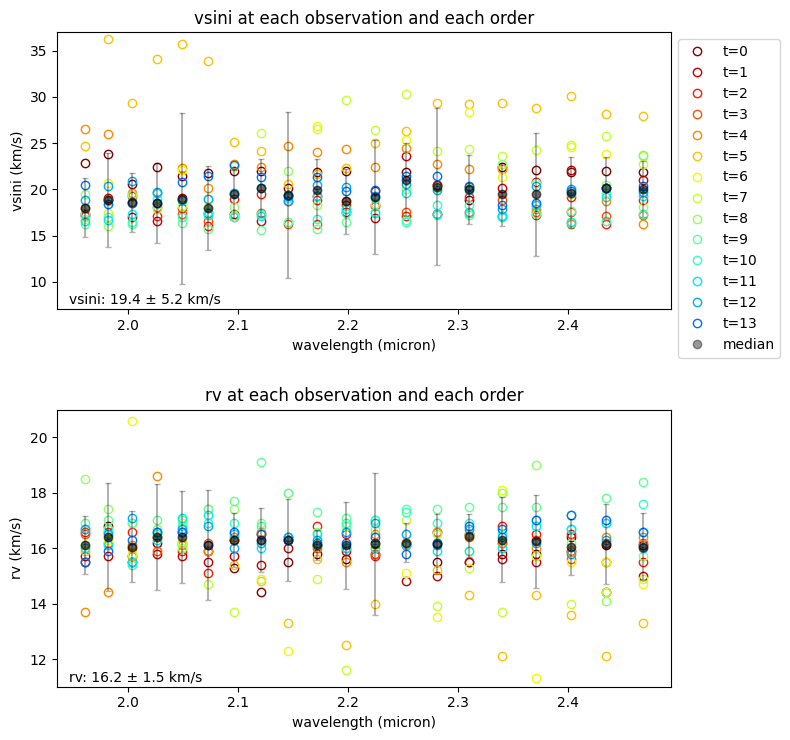

In [98]:
# Plot vsini and rv for bestfittin model - all
plt.figure(figsize=(8,7.5))
plt.subplot(2,1,1)
colors = [cm.jet_r(x) for x in np.linspace(0, 1, nobs+4)]
vsini_points = vsini_2d
rv_points = rv_2d
lld_points = lld_2d
lam_points = np.median(np.median(chiplams[model], axis=0), axis=1) # plot one point per wl

for i, t in enumerate(indices):
    plt.plot(lam_points[:], vsini_points[i], "o", mfc="none", color=colors[t], label=f't={t}')
plt.plot(lam_points, np.nanmedian(vsini_points, axis=0), "o", label="median", color="k", alpha=0.4)
plt.errorbar(lam_points, np.nanmedian(vsini_points, axis=0), yerr=np.nanstd(vsini_points, axis=0), 
             marker="o", color="k", alpha=0.3, ls="none", capsize=2)
plt.xlabel("wavelength (micron)")
plt.ylabel("vsini (km/s)")
plt.ylim(7,37)
plt.title("vsini at each observation and each order")
plt.text(0.02, 0.02, f"vsini: {np.nanmedian(vsini_points):.1f} ± {np.nanstd(vsini_points):.1f} km/s", transform=plt.gca().transAxes)
plt.legend(loc=2, bbox_to_anchor=(1,1));

plt.subplot(2,1,2)
for i, t in enumerate(indices):
    plt.plot(lam_points, rv_points[i], "o", mfc="none", color=colors[t], label=f't={t}')
plt.plot(lam_points, np.nanmedian(rv_points, axis=0), "o", label="median", color="k", alpha=0.4)
plt.errorbar(lam_points, np.nanmedian(rv_points, axis=0), yerr=np.nanstd(rv_points, axis=0), 
             marker="o", color="k", alpha=0.3, ls="none", capsize=2)
plt.xlabel("wavelength (micron)")
plt.ylabel("rv (km/s)")
plt.ylim(11,21)
plt.title("rv at each observation and each order")
plt.text(0.02, 0.02, f"rv: {np.nanmedian(rv_points):.1f} ± {np.nanstd(rv_points):.1f} km/s", transform=plt.gca().transAxes)

plt.tight_layout()

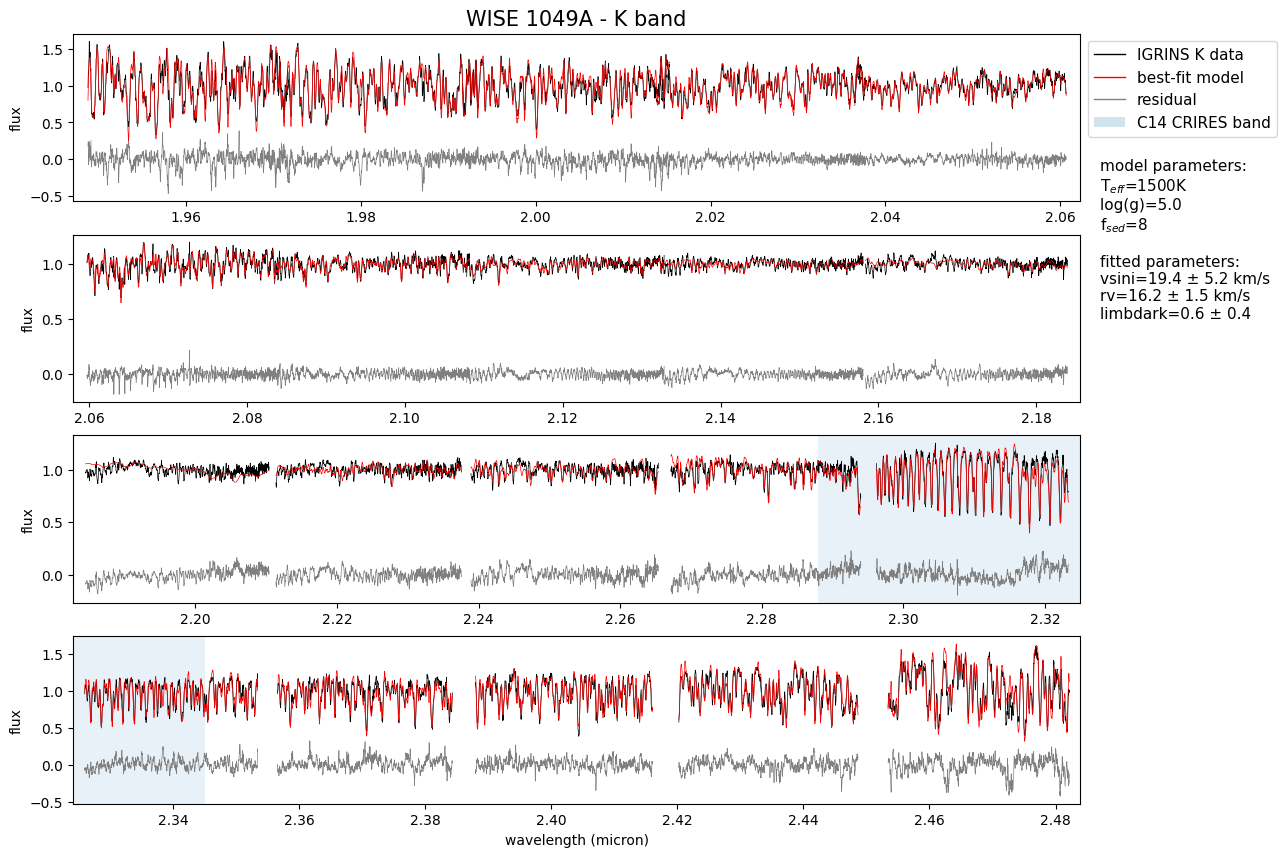

In [83]:
# plot best fitting spectrum
pad = 50
bfit_filename = f'IGRINS_{target}_{band}_{model}.pickle'
with open(f"{datadir}/{bfit_filename}", 'rb') as f:
    ret = pickle.load(f, encoding="latin1")
fobs = ret['fobs0']
fobs = fobs[:20]
wobs = ret['wobs']
plt.figure(figsize=(13,10))
Teff = eval(model[1:5])
logg = 5.0

t=8
for sub in range(4):
    plt.subplot(4,1, 4-sub)
    for jj in range(sub*5, sub*5+5):
        plt.plot(chiplams[model][t,jj, pad:-pad], fobs[t,jj, pad:-pad], linewidth=0.5, color="black", label="observation")
        plt.plot(chiplams[model][t,jj, pad:-pad], fobs[t,jj,pad:-pad] - chipmods[model][t,jj,pad:-pad], linewidth=0.5, color="gray", label="residual")
        if jj in indices:
            plt.plot(chiplams[model][t,jj, pad:-pad], chipmods[model][t,jj, pad:-pad], linewidth=0.5, color="r", label="best-fit model")
        else:
            plt.plot(chiplams[model][t,jj, pad:-pad], chipmods[model][t,jj, pad:-pad], linewidth=0.5, color="r", label="discarded orders")
    plt.ylabel("flux")
    l, r = plt.xlim(chiplams[model][t,sub*5+4].min()-0.001, chiplams[model][t,sub*5].max()+0.001)
    #plt.ylim(-0.5,1.7)
    if sub==1:
        plt.axvspan(2.288, r, alpha=0.1)
    if sub==0:
        plt.axvspan(l, 2.345, alpha=0.1)
        plt.xlabel("wavelength (micron)")
    if sub==3:
        custom_lines = [Line2D([0], [0], color="black", lw=1, label=f"IGRINS {band} data"),
                        Line2D([0], [0], color="r", lw=1, label="best-fit model"),
                        Line2D([0], [0], color="grey", lw=1, label="residual"),
                        #Line2D([0], [0], color="magenta", lw=1, label="discarded orders"),
                        Patch(facecolor='tab:blue', alpha=0.2, label="C14 CRIRES band")
                        ]
        plt.legend(handles=custom_lines, loc=2, bbox_to_anchor=(1,1), fontsize=11)

plt.title(f"WISE {target[1:]} - {band} band", fontsize=15)
plt.text(x=1.02, y=-0.7, s="model parameters: \nT$_{eff}$="+f"{Teff:.0f}K \nlog(g)={logg} \n"+"f$_{sed}$=8\n" + 
                        f"\nfitted parameters: \nvsini={np.nanmedian(vsini_2d)} ± {np.nanstd(vsini_2d):.1f} km/s" +
                        f"\nrv={np.nanmedian(rv_2d)} ± {np.nanstd(rv_2d):.1f} km/s" +
                        f"\nlimbdark={np.nanmedian(lld_2d):.1f} ± {np.nanstd(lld_2d):.1f}",
        fontsize=11, transform=plt.gca().transAxes)
plt.savefig(f"{homedir}/uoedrive/result/paper1/specK_A.png", transparent=True, dpi=200, bbox_inches='tight')

In [159]:
np.array(rv_points)[:,jj] - 27

array([ 1.39383409, -3.75243691, -0.75044532, -0.1309794 ,  0.85776411,
        0.64346756, 30.85070507, -1.46520503, 13.64148607,  6.61158145,
       22.87236302,  1.25088216, 13.22311093, 13.68771703])

In [30]:
22.23/c

7.415141164540749e-05

In [161]:
jj=18
-(chiplams[model][:,jj,0] - np.median(chiplams[model][:,jj,0], axis=0)) *c /4

array([ 39.75082293, -12.67529796,  -3.70265745,   1.47031953,
         1.68401246,   0.93581459,  -0.28239283,  -2.72998383,
        31.47313612,   2.5565145 ,   0.28239283,  -5.02758859,
        -0.49512888,  -3.19798274])